# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Diana Escobar
- Nombre de alumno 2: Matías Donoso


### **Link de repositorio de GitHub:** `https://github.com/Diana1020/Diana`

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

> 1. Apache Spark es un motor unificado para el procesamiento de datos a gran escala, ofreciendo almacenamiento en memoria para cálculos intermedios y una variedad de bibliotecas integradas. Sus principales ventajas sobre Pandas son su escalabilidad para conjuntos de datos grandes, procesamiento en paralelo en clústeres de máquinas, compatibilidad con diversas fuentes de datos y capacidades de procesamiento en tiempo real.

> 2. Un RDD en Spark es una colección distribuida e inmutable de elementos, esencial para operaciones eficientes en paralelo. Una de sus características principales son las dependencias, que rastrean la relación entre RDDs para optimizar la tolerancia a fallos y el rendimiento. Los DataFrames y DataSets son abstracciones más avanzadas que se construyen sobre los RDDs, ofreciendo interfaces con optimizaciones automáticas.

> 3. Las transformaciones en Spark generan un nuevo DataFrame sin modificar el original, como filtrar datos o realizar un mapeo, por ejemplo: filter(), map(). Las acciones desencadenan la ejecución de todas las transformaciones acumuladas, como show(), collect(). Internamente, cuando se ejecuta una acción, Spark optimiza el plan de ejecución, ejecutando las transformaciones en el orden más eficiente y manteniendo un linaje de los datos para proporcionar tolerancia a fallos.

> 4. El particionamiento en Spark es importante para el paralelismo, ya que determina cómo se dividen los datos a través del cluster, un buen particionamiento asegura que las operaciones se realicen localmente en cada nodo, reduciendo el tráfico de red y los cuellos de botella durante el shuffle. Lo cual sirve para ejecuciones más rápidas y uso eficiente de los recursos.

> 5. La función del Spark Driver es coordinar y gestionar las operaciones de una aplicación de Spark. Esto implica solicitar recursos al gestor del clúster, transformar operaciones en gráficos acíclicos dirigidos (DAGs) y distribuir tareas a los Spark Executors, este último es responsable de ejecutar las tareas asignadas por el Spark Driver en los nodos de trabajo del clúster, procesando los datos, devolviendo los resultados al conductor y gestionando los recursos asignados en su nodo específico.

> 6. El Catalyst Optimizer es un motor de optimización de consultas, que construye y optimiza un plan de ejecución para consultas SQL. Utiliza reglas de optimización y técnicas de planificación de costos para transformar una consulta abstracta en un plan eficiente, mejorando así la ejecución al reducir la cantidad de datos a procesar y la complejidad de las operaciones, una de sus principales funciones es incrementar la eficiencia de las consultas SQL, asegurando un uso óptimo de los recursos disponibles.


## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=57c76b5dd21e7f4b2660da0d3953dbf2d67a66174f6a623fd36730bbac87a259
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:

import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType



import matplotlib.pyplot as plt
import plotly.express as px



Cargue los datos usando **pyspark**

In [3]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("datos_lab")

sc = SparkContext(conf = conf)

sc

<SparkContext master=local appName=datos_lab>

In [5]:
# Inicializar SparkSession
spark = SparkSession.builder \
    .appName("datos_lab") \
    .getOrCreate()

df = spark.read.parquet('/content/datos_lab.parquet', header=True, inferSchema=True)

In [6]:
num_rows = df.count()
num_columns = len(df.columns)


print("Filas: ",num_rows)
print("Columnas: ", num_columns)

Filas:  600000
Columnas:  16


### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
> Porque...
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [7]:
## 1.-
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [9]:
## 2.-
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [11]:
## 3.-
sample = df.sample(fraction = 0.05, seed = 19,withReplacement=False)
sample.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|2c12641c-9347-4ec...|1ac0b1a9-e8ee-430...|            112.27|2024-08-01 00:00:00|          NULL|            NULL|     1.0|        33.0|Lake Robertchester|       NULL|           NULL| 

In [14]:
df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

In [15]:
## 6.-
from pyspark.sql.functions import col, when, sum
exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]

df.agg(*exprs).show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [16]:
## 7.-
df = df.na.drop(how="any")

In [17]:
## 8.-
df = df.dropDuplicates()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [18]:
## 1.-
import numpy as np
from pyspark.sql.functions import expr

df = df.withColumn("Transaction bp",expr("log(48 + pow(`Transaction Amount`,36))"))

In [19]:
## 2.-
from pyspark.sql.functions import month

df = df.withColumn("Transaction Month", month("Transaction Date"))

In [20]:
## 3.-

df = df.withColumn("Type of purchase", when(df["Quantity"] >= 6, "Mayorista").otherwise("Minorista"))

In [21]:
df.show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|    Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+------------------+-----------------+----------------+
|48738ee5-2a9f-41a...|359

In [27]:
## 4.-

datos_filtrados = df.filter((df["Type of purchase"] == "Mayorista") & (df["Is An Alien"] == 1.0))
datos_filtrados.show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+---------------

In [25]:
## 5.-

conteo = df.groupBy("Is An Alien").count()
conteo.show()

+-----------+-----+
|Is An Alien|count|
+-----------+-----+
|        0.0|12700|
|        1.0|  688|
+-----------+-----+



In [26]:
## 6.-
from pyspark.sql.functions import avg

promedio_compras = df.groupBy("Payment Method").agg(avg("Transaction Amount").alias("Recaudacion Promedio"))
promedio_compras.show()

+--------------+--------------------+
|Payment Method|Recaudacion Promedio|
+--------------+--------------------+
|    debit card|   232.5659365825011|
| bank transfer|  232.28905840286097|
|        PayPal|   228.3149466300694|
|   credit card|  221.85074693755698|
+--------------+--------------------+



### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

In [28]:
##1.-

df_pd = df.toPandas()

In [30]:
## 2
df_alien = df.filter(df["Is An Alien"] == 1.0)
df_humano = df.filter(df["Is An Alien"] == 0.0).sample(fraction = 0.055, seed = 19,withReplacement=False)

pd_alien = df_alien.toPandas()
pd_humano = df_humano.toPandas()

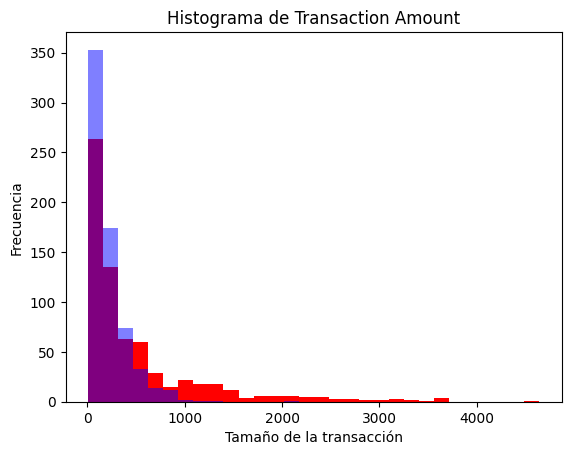

In [31]:
## Histograma de transaction amount
bin_values = np.histogram(np.hstack([pd_alien["Transaction Amount"], pd_humano["Transaction Amount"]]), bins=30)[1]

plt.hist(pd_alien["Transaction Amount"], bins=bin_values,color = 'red')
plt.hist(pd_humano["Transaction Amount"], bins=bin_values,color = 'blue',alpha = 0.5)
plt.title("Histograma de Transaction Amount")
plt.xlabel("Tamaño de la transacción")
plt.ylabel("Frecuencia")
plt.show()

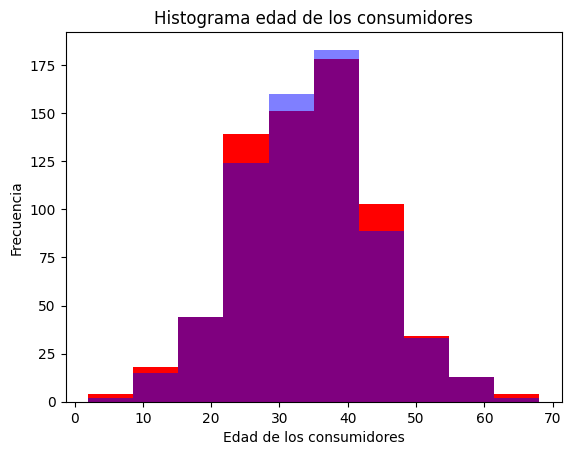

In [32]:
## Customer Age
bin_values = np.histogram(np.hstack([pd_alien["Customer Age"], pd_humano["Customer Age"]]), bins=10)[1]

plt.hist(pd_alien["Customer Age"], bins=bin_values,color = 'red')
plt.hist(pd_humano["Customer Age"], bins=bin_values,color = 'blue',alpha = 0.5)
plt.title("Histograma edad de los consumidores")
plt.xlabel("Edad de los consumidores")
plt.ylabel("Frecuencia")
plt.show()

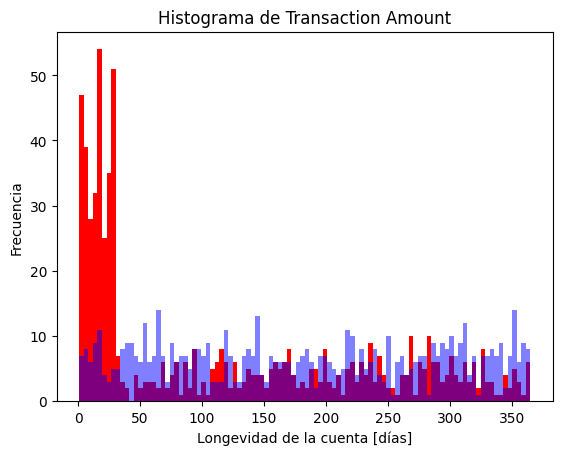

In [33]:
## Customer Age
bin_values = np.histogram(np.hstack([pd_alien["Account Age Days"], pd_humano["Account Age Days"]]), bins=100)[1]

plt.hist(pd_alien["Account Age Days"], bins=bin_values,color = 'red')
plt.hist(pd_humano["Account Age Days"], bins=bin_values,color = 'blue',alpha = 0.5)
plt.title("Histograma de Transaction Amount")
plt.xlabel("Longevidad de la cuenta [días]")
plt.ylabel("Frecuencia")
plt.show()

<ipython-input-34-86a0066365dd>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd_alien["Account Age Days"], bins=10, kde=True, rug=True,color="red")
<ipython-input-34-86a0066365dd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd_humano["Account Age Days"], bins=10, kde=True, rug=True,colo

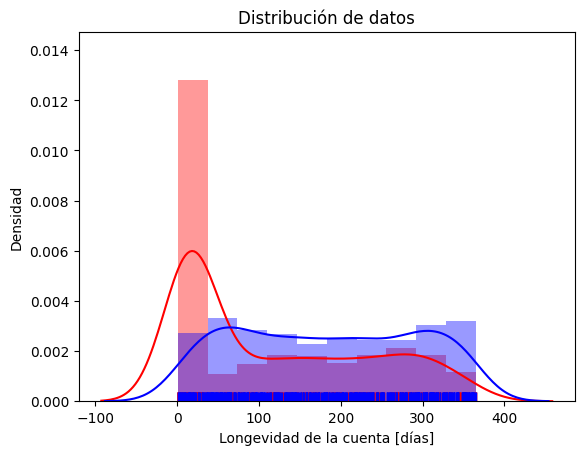

In [34]:
### Visualizaciones numércias
import seaborn as sns
# Crear el distplot
sns.distplot(pd_alien["Account Age Days"], bins=10, kde=True, rug=True,color="red")
sns.distplot(pd_humano["Account Age Days"], bins=10, kde=True, rug=True,color="blue")
plt.title('Distribución de datos')
plt.xlabel('Longevidad de la cuenta [días]')
plt.ylabel('Densidad')
plt.show()

<ipython-input-35-2ced25affd35>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd_alien["Transaction Hour"], bins=3, kde=True, rug=True,color="red")
<ipython-input-35-2ced25affd35>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd_humano["Transaction Hour"], bins=3, kde=True, rug=True,color=

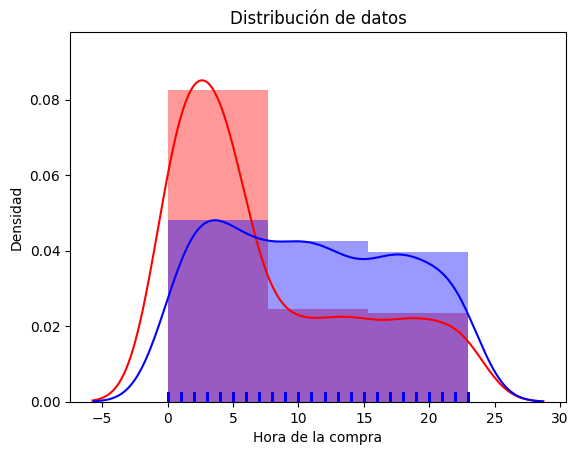

In [35]:
# Crear el distplot
sns.distplot(pd_alien["Transaction Hour"], bins=3, kde=True, rug=True,color="red")
sns.distplot(pd_humano["Transaction Hour"], bins=3, kde=True, rug=True,color="blue")
plt.title('Distribución de datos')
plt.xlabel('Hora de la compra')
plt.ylabel('Densidad')
plt.show()

<ipython-input-36-ef2ca0c9c452>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd_alien["Quantity"], bins=5, kde=True, rug=True,color="red")
<ipython-input-36-ef2ca0c9c452>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pd_humano["Quantity"], bins=5, kde=True, rug=True,color="blue")


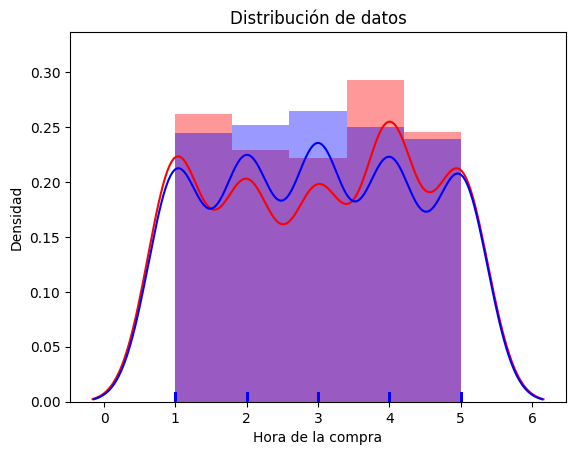

In [36]:
## Quantity

# Crear el distplot
sns.distplot(pd_alien["Quantity"], bins=5, kde=True, rug=True,color="red")
sns.distplot(pd_humano["Quantity"], bins=5, kde=True, rug=True,color="blue")
plt.title('Distribución de datos')
plt.xlabel('Hora de la compra')
plt.ylabel('Densidad')
plt.show()

### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [37]:
## Seleccionemos columnas

table_cols = ['Transaction ID',
 'Customer ID',
 'Transaction Amount',
 'Transaction Date',
 'Product Category',
 'Quantity',
 'Customer Location',
 'Shipping Address',
 'Billing Address',
 'Is Fraudulent',
 'Account Age Days']

In [38]:
from pyspark.sql.window import Window

## 1.- Crear tabla
df.createOrReplaceTempView("datos")

## 2.- Seleccionar a los diez clientes que más compras han realizado
spark.sql("SELECT `Customer ID`, SUM(`Quantity`) AS `Cantidad de compras` FROM datos GROUP BY `Customer ID` ORDER BY `Cantidad de compras` DESC LIMIT 10;").show()


+--------------------+-------------------+
|         Customer ID|Cantidad de compras|
+--------------------+-------------------+
|e91ebafd-1925-400...|                5.0|
|6a6e91d8-d630-466...|                5.0|
|2f3d5b31-bd85-4d7...|                5.0|
|ebf10b43-2999-4fa...|                5.0|
|aa8c72f5-fbcc-4bf...|                5.0|
|6300f942-b86d-433...|                5.0|
|2e835dd8-6c9c-4c8...|                5.0|
|ddfbe502-d51c-4ac...|                5.0|
|ddb1eedb-78a7-403...|                5.0|
|1718476e-0518-41b...|                5.0|
+--------------------+-------------------+



In [39]:
## 3.- Consulta SQL con ventana
spark.sql("SELECT `Customer ID`, MAX(`Transaction Amount`) OVER (PARTITION BY 'Customer ID' ORDER BY 'Transaction Date' ROWS BETWEEN 90 PRECEDING AND CURRENT ROW) AS compra_mas_alta FROM datos DESC LIMIT 10;").show()
## Malditas comillas,,,

## 3.- Implementar una función de ventana
Ventana = Window.partitionBy("Customer ID")

+--------------------+---------------+
|         Customer ID|compra_mas_alta|
+--------------------+---------------+
|35940e8d-0d3a-49b...|         312.37|
|f50c91d9-a44d-48a...|         312.37|
|053682d9-9cf2-4be...|         312.37|
|93923722-7547-4b9...|         312.37|
|e62c7d89-b1d5-45f...|         312.37|
|f9a48260-abfc-45c...|         312.37|
|faec099b-02ac-44c...|         327.76|
|2e747b1e-5bba-47d...|         346.35|
|10c7d4c7-49a3-487...|         346.35|
|cea1bb57-2b3d-45e...|         346.35|
+--------------------+---------------+



### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [41]:
import pickle
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

## 1.- Abrir objeto serializado
with open("/content/datos_lab.pkl", "rb") as f:
    serialized_object = pickle.load(f)

In [42]:
# 2.- Explorar
print(dir(serialized_object))

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params',

In [43]:
help(serialized_object)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [44]:
## 3.- Crear una función personalizada
def custom_fun(col1,col2,col3,col4):
    ## Crear matriz de entrada
    input_data = np.array([1,4]).reshape(1, -1)
    print(col1,col2,col3,col4)
    return serialized_object.predict_proba(input_data)[-1]

# Paso 4: Definir la función UDF
udf_predict_probability = udf(custom_fun, FloatType())

# Paso 5: Generar una nueva columna
# Supongamos que tienes un DataFrame llamado df que contiene los datos de transacción
# Agregaremos una nueva columna llamada "prediction" que contendrá la probabilidad predicha de fraude
# Utilizaremos la función UDF para aplicar la predicción a las columnas relevantes
df = df.withColumn("prediction", udf_predict_probability(
    df['Transaction Amount'],
    df['Quantity'],
    df['Customer Age'],
    df['Transaction Hour']
))

# Mostrar un ejemplo de cómo se aplica la función UDF
df.show()

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "<ipython-input-44-c98562616cbb>", line 6, in custom_fun
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1372, in predict_proba
    return super()._predict_proba_lr(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 434, in _predict_proba_lr
    prob = self.decision_function(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 400, in decision_function
    X = self._validate_data(X, accept_sparse="csr", reset=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 588, in _validate_data
    self._check_n_features(X, reset=reset)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 389, in _check_n_features
    raise ValueError(
ValueError: X has 2 features, but LogisticRegression is expecting 4 features as input.
